In [134]:
import matplotlib
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
import sqldf
warnings.filterwarnings('ignore')

In [85]:
Labels = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

Training = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')

y_test = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv')


In [3]:
len(Training)

59400

In [4]:
len(Labels)

59400

In [5]:
#merging x and y
Training_merged = pd.merge(Training, Labels, on = 'id')

In [6]:
Training_merged.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
Training_merged['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [8]:
conn = sqlite3.connect('Training_merged')

In [9]:
#EDA

query = """
SELECT funder, status_group, COUNT(status_group) Amount
FROM Training_merged
GROUP BY funder,status_group
ORDER BY Amount DESC
LIMIT 100
"""


In [10]:
df_view = sqldf.run(query)
df_view

,funder,status_group,Amount
0,Government Of Tanzania,non functional,4663
1,Government Of Tanzania,functional,3720
2,None,functional,1981
3,Danida,functional,1713
4,Danida,non functional,1242
...,...,...,...
95,Is,functional,100
96,Ded,functional,99
97,Unicef,functional needs repair,99
98,Kkkt_makwale,functional,98


In [11]:
df_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   funder        97 non-null     object
 1   status_group  100 non-null    object
 2   Amount        100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [12]:
#Testing ratio of functional to non fuctional to see important features

df_view_2 = df_view
list1 = []
for i in df_view['funder'].unique():
    Sum1 = df_view.loc[(df_view['funder'] == i) & (df_view['status_group'] == "non functional"), 'Amount'].sum()
    Sum2 = df_view.loc[(df_view['funder'] == i) & (df_view['status_group'] == "functional"), 'Amount'].sum()
    Sum3 = df_view.loc[(df_view['funder'] == i) & (df_view['status_group'] == "functional needs repair"), 'Amount'].sum()
    Percentage = (Sum2+Sum3)/(Sum1+Sum2+Sum3) * 100
    list1.append([dict(zip([i],[Percentage]))])

list1

[[{'Government Of Tanzania': 48.66798767062968}],
 [{None: nan}],
 [{'Danida': 60.115606936416185}],
 [{'Hesawa': 53.04268846503179}],
 [{'Rwssp': 66.52110625909754}],
 [{'World Vision': 70.14446227929373}],
 [{'Kkkt': 59.21375921375921}],
 [{'World Bank': 43.530351437699686}],
 [{'Private Individual': 85.39603960396039}],
 [{'Unicef': 66.13055818353831}],
 [{'Germany Republi': 100.0}],
 [{'Tasaf': 60.63960639606396}],
 [{'Dhv': 60.909090909090914}],
 [{'0': 57.49354005167958}],
 [{'District Council': 47.368421052631575}],
 [{'Ministry Of Water': 33.62521891418564}],
 [{'Dwsp': 73.48951911220715}],
 [{'Netherlands': 75.21929824561403}],
 [{'Adb': 100.0}],
 [{'Norad': 55.42483660130719}],
 [{'Fini Water': 0.0}],
 [{'Tcrs': 42.65486725663717}],
 [{'Hifab': 71.77777777777777}],
 [{'Rc Church': 100.0}],
 [{'Water': 51.08910891089109}],
 [{'Ces(gmbh)': 100.0}],
 [{'Dwe': 46.73913043478261}],
 [{'Wateraid': 100.0}],
 [{'Amref': 42.959427207637226}],
 [{'Oxfam': 100.0}],
 [{'Private': 100.0}]

In [20]:

list2 = []
for i in df_view_3['source_class'].unique():
    Sum1 = df_view_3.loc[(df_view_3['source_class'] == i) & (df_view_3['status_group'] == "non functional"), 'Amount'].sum()
    Sum2 = df_view_3.loc[(df_view_3['source_class'] == i) & (df_view_3['status_group'] == "functional"), 'Amount'].sum()
    Sum3 = df_view_3.loc[(df_view_3['source_class'] == i) & (df_view_3['status_group'] == "functional needs repair"), 'Amount'].sum()
    Percentage = (Sum2+Sum3)/(Sum1+Sum2+Sum3) * 100
    list2.append([dict(zip([i],[Percentage]))])

list2

[[{'groundwater': 60.21749574180023}],
 [{'surface': 66.30402160864347}],
 [{'unknown': 58.63309352517986}]]

In [14]:
query2 = """
SELECT source_class, status_group, COUNT(status_group) Amount
FROM Training_merged
GROUP BY source_class,status_group
ORDER BY Amount DESC
LIMIT 100
"""


In [18]:
df_view_3 = sqldf.run(query2)
df_view_3

,source_class,status_group,Amount
0,groundwater,functional,24835
1,groundwater,non functional,18218
2,surface,functional,7266
3,surface,non functional,4491
4,groundwater,functional needs repair,2741
5,surface,functional needs repair,1571
6,unknown,functional,158
7,unknown,non functional,115
8,unknown,functional needs repair,5


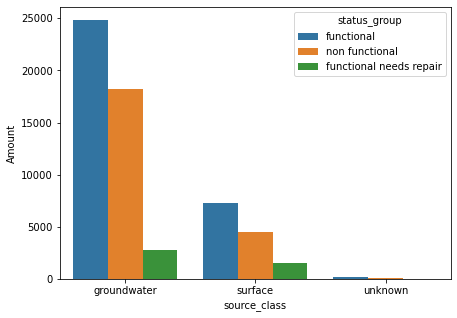

In [275]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = 'source_class', y = 'Amount', 
                  hue = 'status_group', data = df_view_3)
plt.show()

In [26]:


query3 = """
SELECT waterpoint_type_group, status_group, COUNT(status_group) Amount
FROM Training_merged
GROUP BY waterpoint_type_group,status_group
ORDER BY Amount DESC
LIMIT 100
"""

df_view_4 = sqldf.run(query3)


list3 = []
for i in df_view_4['waterpoint_type_group'].unique():
    Sum1 = df_view_4.loc[(df_view_4['waterpoint_type_group'] == i) & (df_view_4['status_group'] == "non functional"), 'Amount'].sum()
    Sum2 = df_view_4.loc[(df_view_4['waterpoint_type_group'] == i) & (df_view_4['status_group'] == "functional"), 'Amount'].sum()
    Sum3 = df_view_4.loc[(df_view_4['waterpoint_type_group'] == i) & (df_view_4['status_group'] == "functional needs repair"), 'Amount'].sum()
    Percentage = (Sum2+Sum3)/(Sum1+Sum2+Sum3) * 100
    list3.append([dict(zip([i],[Percentage]))])

list3

[[{'communal standpipe': 66.04765342960289}],
 [{'hand pump': 67.66925892040257}],
 [{'other': 17.75862068965517}],
 [{'improved spring': 82.6530612244898}],
 [{'cattle trough': 74.13793103448276}],
 [{'dam': 85.71428571428571}]]

In [25]:
df_view_4

,waterpoint_type_group,status_group,Amount
0,communal standpipe,functional,19961
1,communal standpipe,non functional,11756
2,hand pump,functional,10805
3,hand pump,non functional,5654
4,other,non functional,5247
5,communal standpipe,functional needs repair,2908
6,hand pump,functional needs repair,1029
7,other,functional,840
8,improved spring,functional,563
9,other,functional needs repair,293


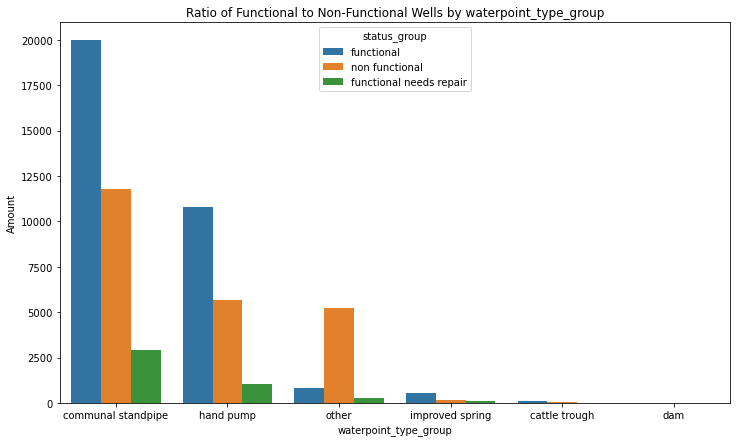

In [456]:
fig, ax = plt.subplots(figsize = (12,7))
sns.barplot(x = 'waterpoint_type_group', y = 'Amount', 
                  hue = 'status_group', data = df_view_4, palette = ['C0', 'C1', 'C2']).set(title='Ratio of Functional to Non-Functional Wells by waterpoint_type_group')
plt.show()

In [28]:
query4 = """ 

SELECT region, status_group, COUNT(status_group) Amount 

FROM Training_merged 

GROUP BY region,status_group 

ORDER BY Amount DESC 

LIMIT 100 

""" 

  

df_view_5 = sqldf.run(query4) 

  

  

list4 = [] 

for i in df_view_5['region'].unique(): 

    Sum1 = df_view_5.loc[(df_view_5['region'] == i) & (df_view_5['status_group'] == "non functional"), 'Amount'].sum() 

    Sum2 = df_view_5.loc[(df_view_5['region'] == i) & (df_view_5['status_group'] == "functional"), 'Amount'].sum() 

    Sum3 = df_view_5.loc[(df_view_5['region'] == i) & (df_view_5['status_group'] == "functional needs repair"), 'Amount'].sum() 

    Percentage = (Sum2+Sum3)/(Sum1+Sum2+Sum3) * 100 

    list4.append([dict(zip([i],[Percentage]))]) 

  

list4

[[{'Iringa': 80.54401208915753}],
 [{'Shinyanga': 68.72741870734644}],
 [{'Kilimanjaro': 67.64101393012103}],
 [{'Mbeya': 60.85363224832938}],
 [{'Arusha': 73.70149253731343}],
 [{'Morogoro': 60.38442336495257}],
 [{'Kagera': 61.248492159227986}],
 [{'Pwani': 60.41745730550284}],
 [{'Mwanza': 54.31979368149581}],
 [{'Ruvuma': 62.272727272727266}],
 [{'Tanga': 59.246171967020025}],
 [{'Kigoma': 69.8153409090909}],
 [{'Mtwara': 37.57225433526011}],
 [{'Tabora': 45.58448187850944}],
 [{'Mara': 48.04469273743017}],
 [{'Singida': 54.41949354992833}],
 [{'Dodoma': 55.338482507950935}],
 [{'Lindi': 35.769728331177234}],
 [{'Manyara': 68.41440303221731}],
 [{'Rukwa': 46.570796460176986}],
 [{'Dar es Salaam': 57.639751552795026}]]

In [29]:
query5 = """ 

SELECT payment_type, status_group, COUNT(status_group) Amount 

FROM Training_merged 

GROUP BY payment_type,status_group 

ORDER BY Amount DESC 

LIMIT 100 

"""  

df_view_6 = sqldf.run(query5) 

list5 = [] 

for i in df_view_6['payment_type'].unique(): 

    Sum1 = df_view_6.loc[(df_view_6['payment_type'] == i) & (df_view_6['status_group'] == "non functional"), 'Amount'].sum() 

    Sum2 = df_view_6.loc[(df_view_6['payment_type'] == i) & (df_view_6['status_group'] == "functional"), 'Amount'].sum() 

    Sum3 = df_view_6.loc[(df_view_6['payment_type'] == i) & (df_view_6['status_group'] == "functional needs repair"), 'Amount'].sum() 

    Percentage = (Sum2+Sum3)/(Sum1+Sum2+Sum3) * 100 

    list5.append([dict(zip([i],[Percentage]))]) 

list5 

[[{'never pay': 52.4143916679817}],
 [{'per bucket': 72.33166388425153}],
 [{'monthly': 77.21686746987952}],
 [{'unknown': 48.547260022066936}],
 [{'annually': 82.01537616694125}],
 [{'on failure': 69.13643331630045}],
 [{'other': 69.16508538899431}]]

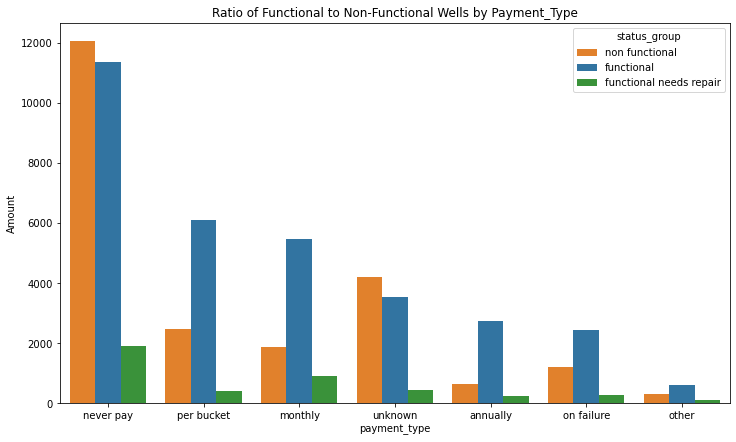

In [458]:
fig, ax = plt.subplots(figsize = (12,7))
sns.barplot(x = 'payment_type', y = 'Amount', 
                  hue = 'status_group', data = df_view_6, palette = ['C1', 'C0', 'C2']).set(title='Ratio of Functional to Non-Functional Wells by Payment_Type')
plt.show()

In [30]:
query6 = """ 

SELECT management, status_group, COUNT(status_group) Amount 

FROM Training_merged 

GROUP BY management,status_group 

ORDER BY Amount DESC 

LIMIT 100 

"""  

df_view_7 = sqldf.run(query6) 

list6 = [] 

for i in df_view_7['management'].unique(): 

    Sum1 = df_view_7.loc[(df_view_7['management'] == i) & (df_view_7['status_group'] == "non functional"), 'Amount'].sum() 

    Sum2 = df_view_7.loc[(df_view_7['management'] == i) & (df_view_7['status_group'] == "functional"), 'Amount'].sum() 

    Sum3 = df_view_7.loc[(df_view_7['management'] == i) & (df_view_7['status_group'] == "functional needs repair"), 'Amount'].sum() 

    Percentage = (Sum2+Sum3)/(Sum1+Sum2+Sum3) * 100 

    list6.append([dict(zip([i],[Percentage]))]) 

list6 

[[{'vwc': 57.3135507443158}],
 [{'wug': 69.8541826554106}],
 [{'water board': 83.02079781793385}],
 [{'wua': 77.15976331360946}],
 [{'private operator': 77.11821410451547}],
 [{'parastatal': 69.62669683257919}],
 [{'other': 66.35071090047393}],
 [{'water authority': 55.088495575221245}],
 [{'company': 41.16788321167883}],
 [{'unknown': 44.741532976827095}],
 [{'other - school': 24.242424242424242}],
 [{'trust': 66.66666666666666}]]

In [32]:
query8 = """ 

SELECT basin, status_group, COUNT(status_group) Amount 

FROM Training_merged 

GROUP BY basin,status_group 

ORDER BY Amount DESC 

LIMIT 100 

"""  

df_view_8 = sqldf.run(query8) 

list8 = [] 

for i in df_view_8['basin'].unique(): 

    Sum1 = df_view_8.loc[(df_view_8['basin'] == i) & (df_view_8['status_group'] == "non functional"), 'Amount'].sum() 

    Sum2 = df_view_8.loc[(df_view_8['basin'] == i) & (df_view_8['status_group'] == "functional"), 'Amount'].sum() 

    Sum3 = df_view_8.loc[(df_view_8['basin'] == i) & (df_view_8['status_group'] == "functional needs repair"), 'Amount'].sum() 

    Percentage = (Sum2+Sum3)/(Sum1+Sum2+Sum3) * 100 

    list8.append([dict(zip([i],[Percentage]))]) 

list8 

[[{1.0: 62.385462781838775}], [{0.0: 59.25565973016236}], [{nan: nan}]]

In [33]:
query8 = """ 

SELECT basin, status_group, COUNT(status_group) Amount 

FROM Training_merged 

GROUP BY basin,status_group 

ORDER BY Amount DESC 

LIMIT 100 

"""  

df_view_8 = sqldf.run(query8) 

list8 = [] 

for i in df_view_8['basin'].unique(): 

    Sum1 = df_view_8.loc[(df_view_8['basin'] == i) & (df_view_8['status_group'] == "non functional"), 'Amount'].sum() 

    Sum2 = df_view_8.loc[(df_view_8['basin'] == i) & (df_view_8['status_group'] == "functional"), 'Amount'].sum() 

    Sum3 = df_view_8.loc[(df_view_8['basin'] == i) & (df_view_8['status_group'] == "functional needs repair"), 'Amount'].sum() 

    Percentage = (Sum2+Sum3)/(Sum1+Sum2+Sum3) * 100 

    list8.append([dict(zip([i],[Percentage]))]) 

list8 

[[{'Pangani': 65.42505592841164}],
 [{'Lake Victoria': 59.41647150663544}],
 [{'Rufiji': 69.01955867602808}],
 [{'Internal': 64.72703917790624}],
 [{'Lake Nyasa': 70.28515240904622}],
 [{'Wami / Ruvu': 56.873225321529986}],
 [{'Lake Tanganyika': 59.84141791044776}],
 [{'Ruvuma / Southern Coast': 44.42466058312931}],
 [{'Lake Rukwa': 51.75224123879381}]]

In [53]:
query9 = """ 

SELECT construction_year, 
status_group, 
basin,
region,
payment_type,
waterpoint_type,
management


FROM Training_merged 


"""  

df_good_columns = sqldf.run(query9)
df_good_columns.head()

,construction_year,status_group,basin,region,payment_type,waterpoint_type,management
0,1999,functional,Lake Nyasa,Iringa,annually,communal standpipe,vwc
1,2010,functional,Lake Victoria,Mara,never pay,communal standpipe,wug
2,2009,functional,Pangani,Manyara,per bucket,communal standpipe multiple,vwc
3,1986,non functional,Ruvuma / Southern Coast,Mtwara,never pay,communal standpipe multiple,vwc
4,0,functional,Lake Victoria,Kagera,never pay,communal standpipe,other


In [192]:
#one hot encoding categorical features

ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(df_test[[ 'basin', 'region', 'payment_type','waterpoint_type', 'management']])

# Getting a DF
df_onehot = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names(), index=df_test.index)

df_onehot.head()

,x0_Lake Nyasa,x0_Lake Rukwa,x0_Lake Tanganyika,x0_Lake Victoria,x0_Pangani,x0_Rufiji,x0_Ruvuma / Southern Coast,x0_Wami / Ruvu,x1_Dar es Salaam,x1_Dodoma,...,x2_on failure,x2_other,x2_per bucket,x2_unknown,x3_communal standpipe,x3_communal standpipe multiple,x3_dam,x3_hand pump,x3_improved spring,x3_other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [193]:
X_numeric = df_good_columns[['construction_year']]
X_train_df = pd.concat([df_combine, df_onehot], axis=1)

X_train_df                          

,Years_Old,x0_Lake Nyasa,x0_Lake Rukwa,x0_Lake Tanganyika,x0_Lake Victoria,x0_Pangani,x0_Rufiji,x0_Ruvuma / Southern Coast,x0_Wami / Ruvu,x1_Dar es Salaam,...,x2_on failure,x2_other,x2_per bucket,x2_unknown,x3_communal standpipe,x3_communal standpipe multiple,x3_dam,x3_hand pump,x3_improved spring,x3_other
0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,15.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
59396,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
59397,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59398,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [161]:

# Imputing data for rows missing construction year

df_test = df_good_columns
mymap = {'functional': 2, 'non functional': 0, 'functional needs repair':1}

df_test=df_test.applymap(lambda s: mymap.get(s) if s in mymap else s)

df_test = df_test.drop(df_test[df_test['status_group'] == 1].index)

df_test['construction_year'].replace(to_replace=0, value=np.NaN, inplace=True)

mean_value = df_test['construction_year'].mean()

df_test['construction_year'].replace(to_replace=np.NaN, value=int(mean_value), inplace=True)

df_test['Years_Old'] = (df_test['construction_year'].max() + 1) - df_test['construction_year']

y = df_test['status_group']

df_combine = df_test['Years_Old']

df_test

,construction_year,status_group,basin,region,payment_type,waterpoint_type,management,Years_Old
0,1999.0,2,Lake Nyasa,Iringa,annually,communal standpipe,vwc,15.0
1,2010.0,2,Lake Victoria,Mara,never pay,communal standpipe,wug,4.0
2,2009.0,2,Pangani,Manyara,per bucket,communal standpipe multiple,vwc,5.0
3,1986.0,0,Ruvuma / Southern Coast,Mtwara,never pay,communal standpipe multiple,vwc,28.0
4,1996.0,2,Lake Victoria,Kagera,never pay,communal standpipe,other,18.0
...,...,...,...,...,...,...,...,...
59395,1999.0,2,Pangani,Kilimanjaro,per bucket,communal standpipe,water board,15.0
59396,1996.0,2,Rufiji,Iringa,annually,communal standpipe,vwc,18.0
59397,1996.0,2,Rufiji,Mbeya,monthly,hand pump,vwc,18.0
59398,1996.0,2,Rufiji,Dodoma,never pay,hand pump,vwc,18.0


In [194]:
#creating a split so we can test models

X_train, X_test, y_train, y_test = train_test_split(X_train_df, y, test_size = 0.3)

In [160]:
X_train['Years_Old'].max()

53.0

In [213]:
#scaling

scaler = preprocessing.MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.094340,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.622642,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.603774,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.320755,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.037736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38553,0.056604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38554,0.433962,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38555,0.320755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38556,0.320755,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [68]:
lr1 = LinearRegression()
lr1.fit(X_train_df, y_train)

LinearRegression()

In [69]:
lr1.score(X_train_df, y_train)

0.20816909212873913

In [166]:
logreg_clf = LogisticRegression()

In [196]:
logreg_clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [304]:
weights = logreg_clf.coef_.tolist()
weight_values = weights[0]
weight_values

[-2.202265602235045,
 0.499079725480104,
 -0.21548113123166007,
 0.11248047450467809,
 0.030668511810309548,
 0.11639191726489821,
 -0.0170126628485883,
 -0.038719300713610544,
 -0.2659343173478934,
 -0.8060825810261966,
 -0.7023972417579062,
 -0.25734050938816194,
 -0.6358509649682393,
 -0.5757694440021643,
 -0.6781522223244288,
 -1.3965943783761865,
 -0.3672569904867782,
 -0.885815019183458,
 -1.0727776092327834,
 -0.6720624381260106,
 -1.0401743144624802,
 -0.46487630139992564,
 -0.8648561911470568,
 -1.1379158671493417,
 -1.1228925724176284,
 0.1793446711360435,
 -0.6360113401304673,
 -1.128285717016218,
 -0.44419359894846505,
 -0.358992174856731,
 -1.3309903922882096,
 -0.671059665704336,
 -0.9306462328626195,
 -0.24167115185421068,
 -1.5659557767087977,
 -0.0306243494224076,
 -1.1099958260195737,
 0.5190387163913358,
 0.10828426770759776,
 1.1417324181627357,
 -2.217615795328736]

In [316]:
column_headers = X_train.columns.values.tolist()

tuples = [(key, value)
          for i, (key, value) in enumerate(zip(column_headers, weight_values))]
res = dict(tuples)

print(res)

{'Years_Old': -2.202265602235045, 'x0_Lake Nyasa': 0.499079725480104, 'x0_Lake Rukwa': -0.21548113123166007, 'x0_Lake Tanganyika': 0.11248047450467809, 'x0_Lake Victoria': 0.030668511810309548, 'x0_Pangani': 0.11639191726489821, 'x0_Rufiji': -0.0170126628485883, 'x0_Ruvuma / Southern Coast': -0.038719300713610544, 'x0_Wami / Ruvu': -0.2659343173478934, 'x1_Dar es Salaam': -0.8060825810261966, 'x1_Dodoma': -0.7023972417579062, 'x1_Iringa': -0.25734050938816194, 'x1_Kagera': -0.6358509649682393, 'x1_Kigoma': -0.5757694440021643, 'x1_Kilimanjaro': -0.6781522223244288, 'x1_Lindi': -1.3965943783761865, 'x1_Manyara': -0.3672569904867782, 'x1_Mara': -0.885815019183458, 'x1_Mbeya': -1.0727776092327834, 'x1_Morogoro': -0.6720624381260106, 'x1_Mtwara': -1.0401743144624802, 'x1_Mwanza': -0.46487630139992564, 'x1_Pwani': -0.8648561911470568, 'x1_Rukwa': -1.1379158671493417, 'x1_Ruvuma': -1.1228925724176284, 'x1_Shinyanga': 0.1793446711360435, 'x1_Singida': -0.6360113401304673, 'x1_Tabora': -1.1282

In [320]:
#looking at important features

keys = list(res.keys())
values = list(res.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
sorted_dict

{'x3_other': -2.217615795328736,
 'Years_Old': -2.202265602235045,
 'x2_unknown': -1.5659557767087977,
 'x1_Lindi': -1.3965943783761865,
 'x2_never pay': -1.3309903922882096,
 'x1_Rukwa': -1.1379158671493417,
 'x1_Tabora': -1.128285717016218,
 'x1_Ruvuma': -1.1228925724176284,
 'x3_communal standpipe multiple': -1.1099958260195737,
 'x1_Mbeya': -1.0727776092327834,
 'x1_Mtwara': -1.0401743144624802,
 'x2_other': -0.9306462328626195,
 'x1_Mara': -0.885815019183458,
 'x1_Pwani': -0.8648561911470568,
 'x1_Dar es Salaam': -0.8060825810261966,
 'x1_Dodoma': -0.7023972417579062,
 'x1_Kilimanjaro': -0.6781522223244288,
 'x1_Morogoro': -0.6720624381260106,
 'x2_on failure': -0.671059665704336,
 'x1_Singida': -0.6360113401304673,
 'x1_Kagera': -0.6358509649682393,
 'x1_Kigoma': -0.5757694440021643,
 'x1_Mwanza': -0.46487630139992564,
 'x1_Tanga': -0.44419359894846505,
 'x1_Manyara': -0.3672569904867782,
 'x2_monthly': -0.358992174856731,
 'x0_Wami / Ruvu': -0.2659343173478934,
 'x1_Iringa': -0.

In [214]:
X_test_scaled2 = np.reshape(X_test_scaled, (-1,1))

y_pred_log = logreg_clf.predict(X_train_scaled)
y_pred_log

array([2, 0, 0, ..., 0, 0, 2], dtype=int64)

In [180]:
y_train.value_counts()

2    22517
0    16041
Name: status_group, dtype: int64

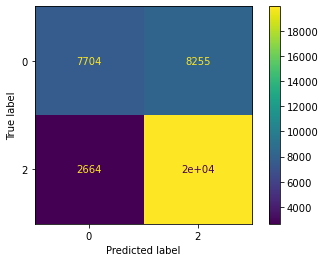

In [190]:



plot_confusion_matrix(logreg_clf, X_train_scaled, y_train)


In [215]:
#Making Decision Tree

tree_clf = DecisionTreeClassifier(criterion = 'gini', random_state=42)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [380]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 35, splitter = 'best' , random_state=42, min_samples_split=3, \
                                 min_samples_leaf=1)
tree_clf.fit(X_train, y_train)

# Accuracy on training data & test data
print('Training:', tree_clf.score(X_train, y_train))
print('Testing:', tree_clf.score(X_test, y_test))


Training: 0.7930131230872971
Testing: 0.752375189107413


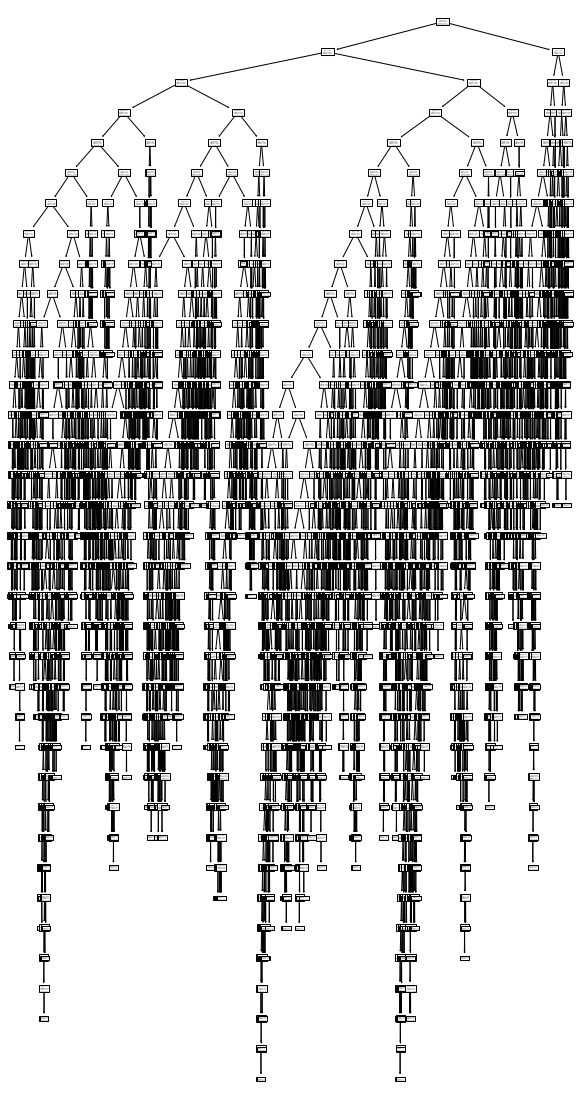

In [450]:
f, ax = plt.subplots(figsize=(10, 20))
plot_tree(tree_clf, ax=ax);

In [405]:
dt = DecisionTreeClassifier(random_state=42)
feature_used = X_train.columns
dt.fit(X_train_df, y)

for fi, feature in zip(dt.feature_importances_, feature_used):
    print(fi, feature)


0.26235731177825516 Years_Old
0.009082963038566228 x0_Lake Nyasa
0.009269100938371622 x0_Lake Rukwa
0.009174421124077977 x0_Lake Tanganyika
0.009837662784081934 x0_Lake Victoria
0.016197133835358257 x0_Pangani
0.011284769241010411 x0_Rufiji
0.011082734667918856 x0_Ruvuma / Southern Coast
0.010399966882176204 x0_Wami / Ruvu
0.005217489246727433 x1_Dar es Salaam
0.005221963978891701 x1_Dodoma
0.015205305067098239 x1_Iringa
0.0036160628821656935 x1_Kagera
0.008915199676995732 x1_Kigoma
0.015176604963567972 x1_Kilimanjaro
0.006920789765569425 x1_Lindi
0.007245778824320716 x1_Manyara
0.006938110221881076 x1_Mara
0.0013053971818986164 x1_Mbeya
0.008419926024981548 x1_Morogoro
0.006965363916024107 x1_Mtwara
0.007993849094558102 x1_Mwanza
0.012303887190186165 x1_Pwani
0.005556828132898785 x1_Rukwa
0.008494568596102682 x1_Ruvuma
0.03432654100565378 x1_Shinyanga
0.016727374883429316 x1_Singida
0.004626597270955347 x1_Tabora
0.009527543612148756 x1_Tanga
0.012223725244852442 x2_monthly
0.04487948

In [429]:
#getting the 5 biggest features

sorted_index_array = np.argsort(dt.feature_importances_) 
  

sorted_array = dt.feature_importances_[sorted_index_array] 

n = 5

rslt = sorted_array[ -n: ] 
Names = ["Basin: Shinyanga", "Payment Type: never pay", "Waterpoint Type: communal standpipe multiple", "Waterpoint Type: Other", "Years Old"]
# show the output 

rslt=rslt.tolist()
rslt

[0.03432654100565378,
 0.04487948140608829,
 0.053089512727542955,
 0.23723272314691654,
 0.26235731177825516]

In [443]:


Largest_dict = dict(zip(Names, rslt))


graph_df=pd.DataFrame(data=Largest_dict, columns=['Features', 'Weights'])

graph_df['Features'] = Names
graph_df['Weights'] = rslt
graph_df

,Features,Weights
0,Basin: Shinyanga,0.034327
1,Payment Type: never pay,0.044879
2,Waterpoint Type: communal standpipe multiple,0.053090
3,Waterpoint Type: Other,0.237233
4,Years Old,0.262357


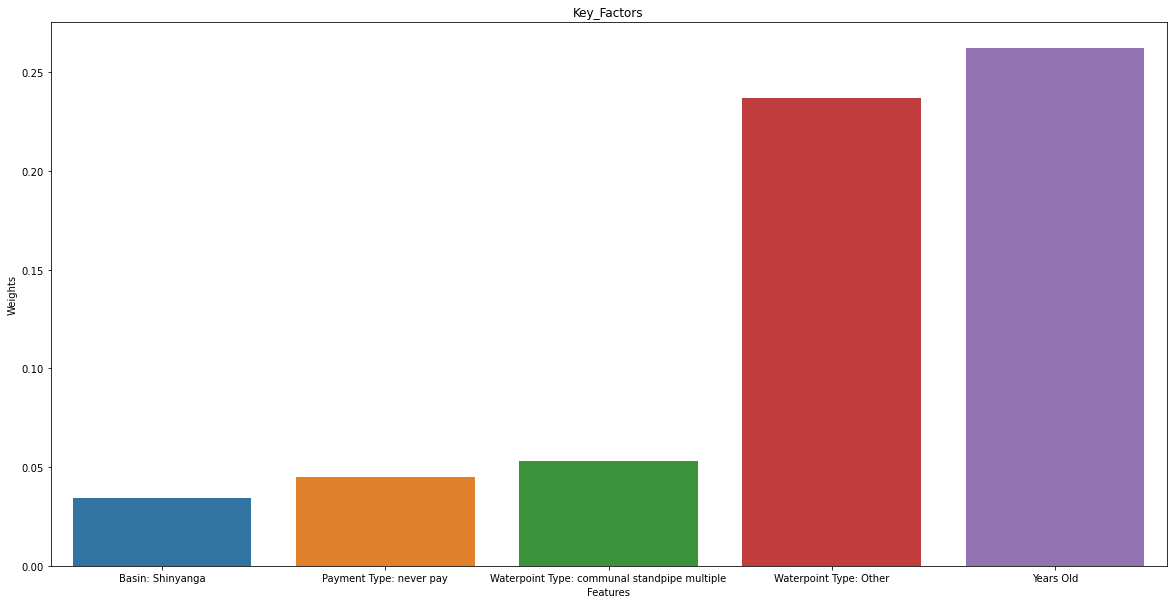

In [447]:


fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x = 'Features', y = 'Weights', data = graph_df).set(title='Key_Factors')
plt.show()

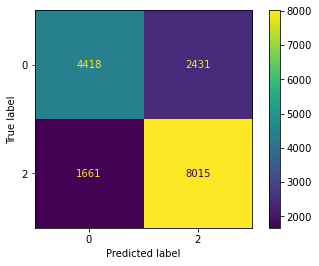

In [381]:
plot_confusion_matrix(tree_clf, X_test, y_test)

In [ ]:
# hyperparameters minsamplesplit, minsampleleaf, 

In [392]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

DT_ps=precision_score(y_test, y_pred, pos_label=2)
DT_rs=recall_score(y_test, y_pred,pos_label=2)
DT_f1 = f1_score(y_pred, y_test, pos_label=2)

In [383]:
y_pred = tree_clf.predict(X_test)

In [394]:
#precision score
DT_ps

0.7672793413746889

In [395]:
#recall score
DT_rs

0.8283381562629185

In [396]:
#f1 score
DT_f1

0.7966404929927442